In [33]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import  StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier;

In [34]:
warnings.filterwarnings('ignore');

In [35]:
df = pd.read_csv('HR_Dataset_test.csv')
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
11680,0.59,0.69,3,200,3,0,0,0,sales,low
13310,0.61,0.90,2,142,3,0,0,0,marketing,high
9100,0.69,0.90,4,148,2,0,0,0,sales,low
1048,0.44,0.50,2,132,3,0,1,0,technical,low
1402,0.84,0.86,5,240,5,0,1,0,accounting,medium


In [36]:
df.rename(columns={'Departments ':'Departments'},inplace=True);
print(df.columns);

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')


In [37]:
#Find the shape of Our dataset
print(df.shape);

(14999, 10)


In [38]:
#Get Information Abdout Our Dataset Like Total Number of Rows, Total Number of Columns, Datatypes of each Column and Memort Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [39]:
#Get Overall Statistics About The Dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [40]:
#Check Null Values In The Dataset
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [41]:
#Taking Care of Duplicated Values
df.duplicated().any()

True

In [42]:
#Display the duplicated data values
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [43]:
data = df.drop_duplicates()
data.shape

(11991, 10)

In [44]:
14999-11991

3008

<Axes: ylabel='Departments'>

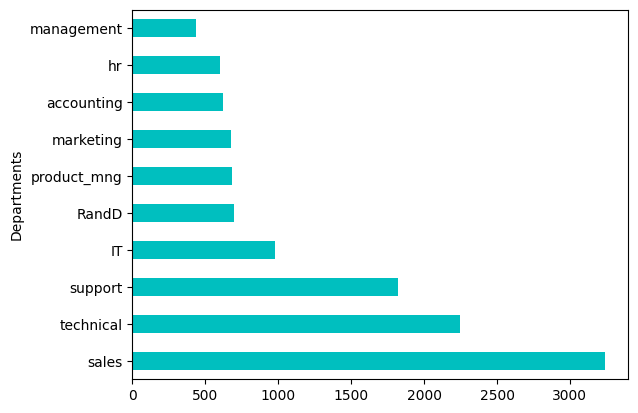

In [45]:
data['Departments'].value_counts().plot(kind='barh',color='c')

<Axes: xlabel='left'>

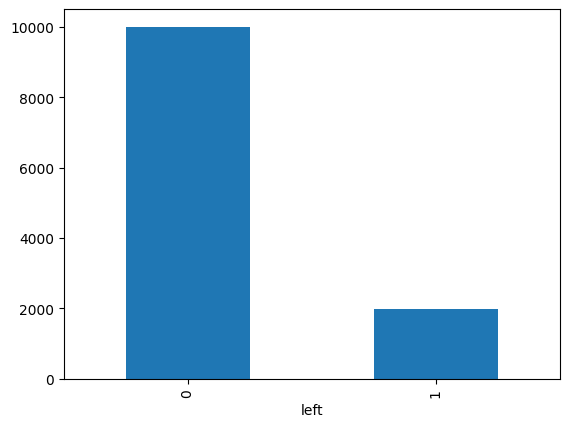

In [46]:
data['left'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

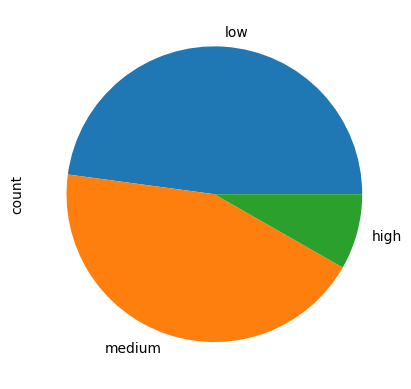

In [47]:
data['salary'].value_counts().plot(kind='pie')

In [48]:
#Store Feature Matrix in X and Response (Target) in Vector y
x = data.drop(columns=['left'])
y= data['left']
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [49]:
#Column Transformer and Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['Departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
],remainder='passthrough')

In [50]:
pipeline = Pipeline([('preprocessor',preprocessor),
          ('model',LogisticRegression())
          ])

In [51]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [52]:
#Splitting The Dataset Into Training Set And Test Set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [53]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [54]:
y_pred = pipeline.predict(x_test)
accuracy_score(y_test,y_pred)

0.8370154230929554

In [55]:
precision_score(y_test,y_pred)

0.5209580838323353

In [56]:
recall_score(y_test,y_pred)

0.2185929648241206

In [57]:
def model_scorer(model_name,model):
      output = []
      output.append(model_name)

      pipeline = Pipeline([('preprocessor',preprocessor),
          ('model',model)
          ])
      x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
      pipeline.fit(x_train,y_train)
      
      y_pred = pipeline.predict(x_test)
    
      output.append(accuracy_score(y_test,y_pred))
      output.append(precision_score(y_test,y_pred))
      output.append(recall_score(y_test,y_pred))

      return output
    
    

In [58]:
model_dict={
    'log': LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

In [59]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9670696123384743, 0.8843373493975903, 0.9221105527638191],
 ['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [60]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['Departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
],remainder='passthrough')

pipeline = Pipeline([('preprocessor',preprocessor),
          ('model',RandomForestClassifier())
          ])


In [61]:
pipeline.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [62]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'Departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [63]:
#Save The Model
import pickle

with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [64]:
result = pipeline_saved.predict(sample)
if result == 1:
    print("An Employee may leave the organisation")
else:
    print("An Employyee may stay with the organisation")

An Employee may leave the organisation


In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath=filedialog.askopenfilename(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            data.columns = data.columns.str.replace('\n', '')
            data.rename(columns={'Departments ':'departments'},inplace=True)
            data = data.drop_duplicates()
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            print(f"Failed to open file {e}")
            
def process_data(data):
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
    
    result=pipeline.predict(data)
    
    y_pred = ["An employee may leave the organization." if pred == 1 
              else "An employee may stay with the organization." 
              for pred in result]
        
    data['Predicted_target']=y_pred
    save_file(data)

def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
            
    
# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()